## PREDICTIVE ANALYTICS FOR CUSTOMER CHURN IN BANKING

### INTRODUCTION
 - In today's fast-changing world of banking, it's crucial for financial institutions to figure out why customers decide to leave. Thanks to advanced machine learning tools, we can now dig into a big dataset (10,000 rows and 17 columns) to find trends and understand what makes customers leave a bank. This project is all about exploring and understanding the reasons behind customers leaving a bank.

### OBJECTIVE
 - The main goal of this machine learning project is to create a smart model that can predict when a customer might leave a bank. We'll use different information like credit scores, where customers live, their age, how long they've been with the bank, and more to build this model. The idea is to be able to predict when a customer might leave so the bank can do things to keep them. This could include special programs, better services, or targeted efforts to make customers stick around.

### RELEVANCE
 - Banks spend a lot of money to get new customers, so it makes sense to try and keep the ones they already have. This project is important because it gives banks a heads-up about who might leave, allowing them to do things to keep those customers happy. By knowing what factors influence customers leaving, banks can take action to keep them around. It's like having a heads-up on how to keep customers happy and stay competitive in the banking world.

## IMPORTING LIBRARIES

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

## READING DATA

In [20]:
data=pd.read_csv("Churn_Modelling.csv")

In [21]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
# No Null values found

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
data.duplicated().sum()

0

## DATA VISUALISATION

In [26]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

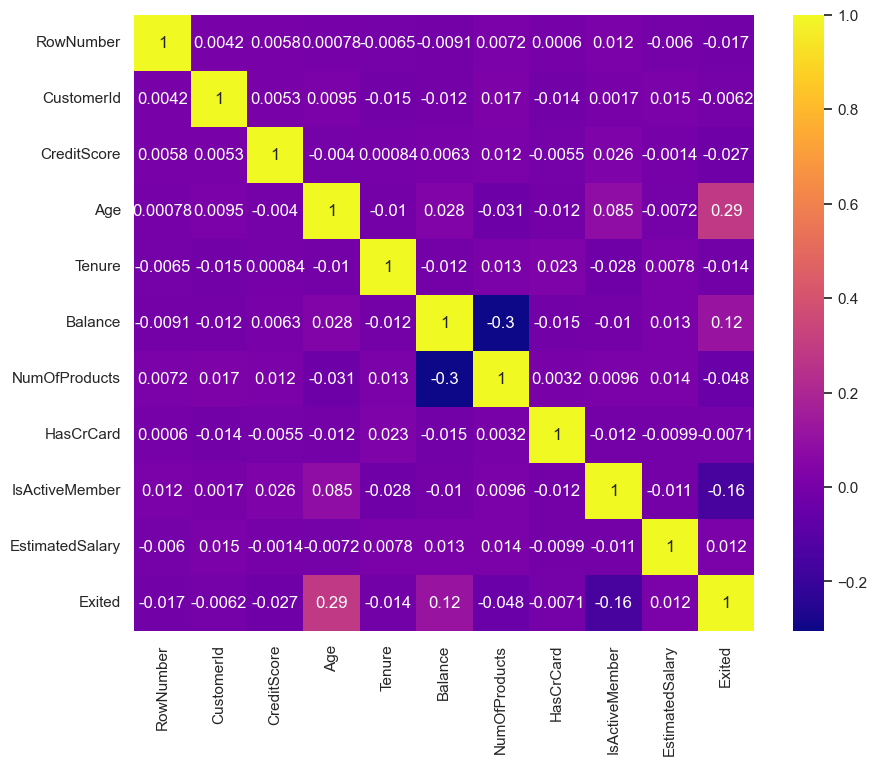

In [27]:
# Correlation plot

sns.set(style="white")  
plt.figure(figsize=(10, 8))  


sns.heatmap(corr, annot=True, cmap="plasma")


plt.show()

Gender
Male      5457
Female    4543
Name: count, dtype: int64


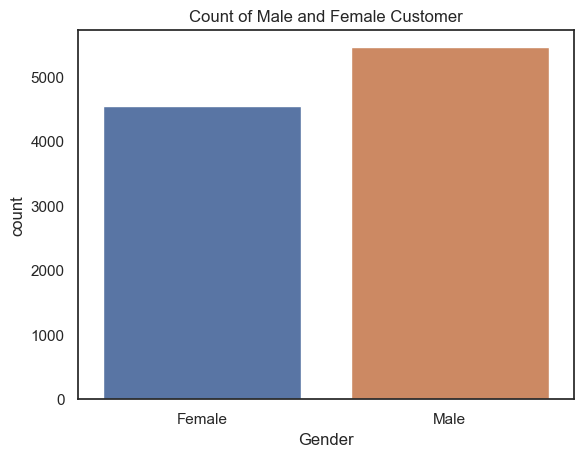

In [28]:
print(data['Gender'].value_counts())
plt.title('Count of Male and Female Customer')

sns.countplot(data=data, x='Gender')
plt.show()

#### 54.5% of cutomers are Males and 45.4% are females

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64


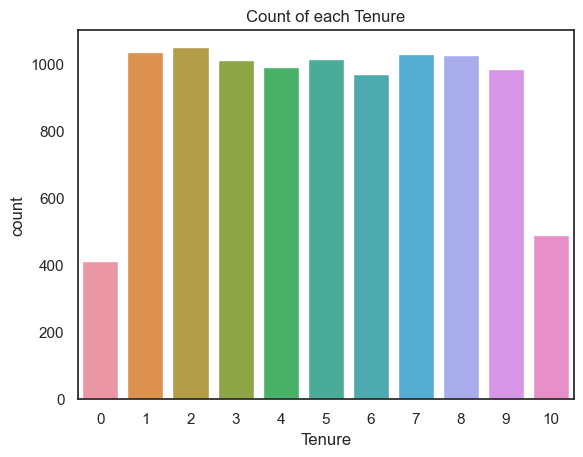

In [29]:
print(data['Tenure'].value_counts())

plt.title("Count of each Tenure")
sns.countplot(data=data, x='Tenure')
plt.show()

#### Most of the customers are clients of the bank for 1-2 years,followed by customers who are clients for 7-8 years.
#### So, the bank have good numbers of relatively new customers and old customers also

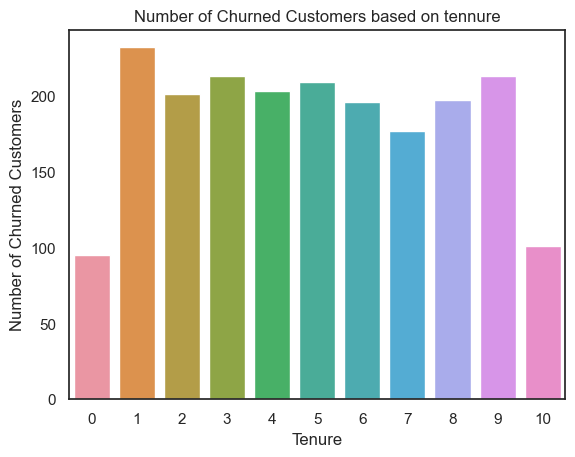

In [30]:
sns.countplot(data=data[data['Exited'] == 1], x='Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Churned Customers')
plt.title('Number of Churned Customers based on tennure')
plt.show()

#### As expected most of the customers who churned have been with bank for 1-3 years,but surprisingly good number of customers who have been with the bank for 9 years have also churned

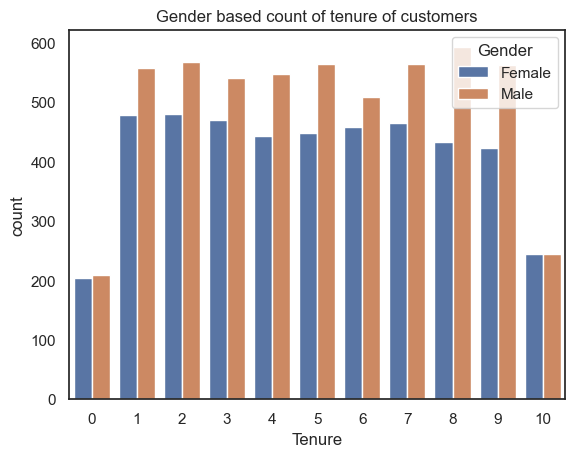

In [31]:


sns.countplot(data=data, x='Tenure', hue='Gender')
plt.title("Gender based count of tenure of customers")
plt.show()

#### Most of the women customers have been with the bank of 1-3 years, whereas most number of male customers have been woth the bank 7-9 years. Male Customers are more long term customers.


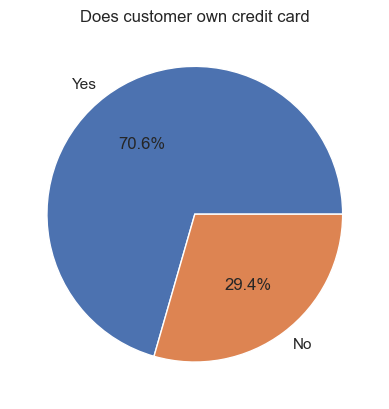

In [32]:
percentage_values = data['HasCrCard'].value_counts(normalize=True) * 100


plt.pie(percentage_values, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Does customer own credit card')
plt.show()




#### Majority customers own credit cards

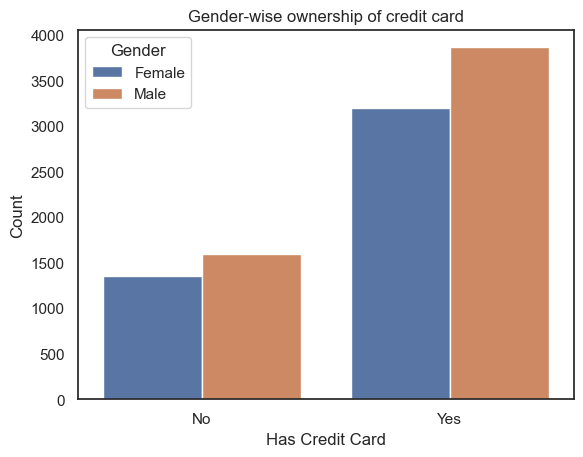

In [33]:
sns.countplot(data=data, x='HasCrCard', hue='Gender')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Gender-wise ownership of credit card')
plt.legend(title='Gender')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

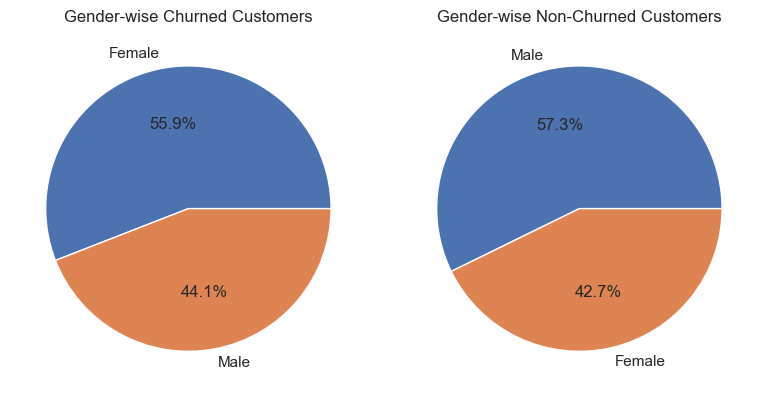

In [34]:
# Set up a 1x2 grid for the subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Calculate percentage values for gender-wise churn analysis
percentage_values_gender_churned = data[data['Exited'] == 1]['Gender'].value_counts(normalize=True) * 100

# Plot pie chart for gender-wise churned customers
axes[0].pie(percentage_values_gender_churned, labels=percentage_values_gender_churned.index, autopct='%1.1f%%')
axes[0].set_title('Gender-wise Churned Customers')

# Calculate percentage values for gender-wise non-churned analysis
percentage_values_gender_non_churned = data[data['Exited'] == 0]['Gender'].value_counts(normalize=True) * 100

# Plot pie chart for gender-wise non-churned customers
axes[1].pie(percentage_values_gender_non_churned, labels=percentage_values_gender_non_churned.index, autopct='%1.1f%%')
axes[1].set_title('Gender-wise Non-Churned Customers')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

#### 56% of women customers churned and 57.3% of male Customers also churned. male customers are more likely to get churned than women customers

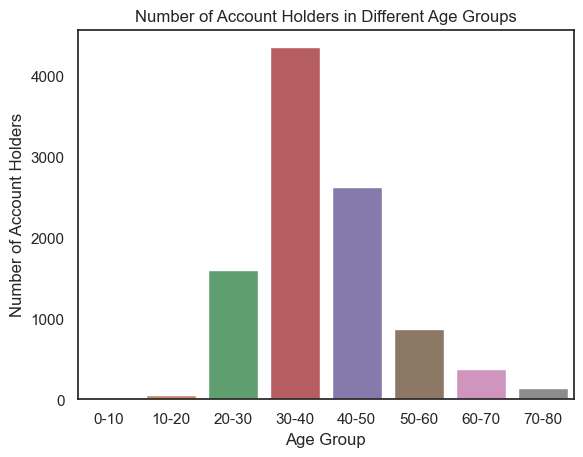

In [35]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70,80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)


sns.countplot(data=data, x='AgeGroup')
plt.xlabel('Age Group')
plt.ylabel('Number of Account Holders')
plt.title('Number of Account Holders in Different Age Groups')
plt.show()

#### Most of the customers (more than 40%) are between the age group 30-40 followed by 40-50and 20-30.

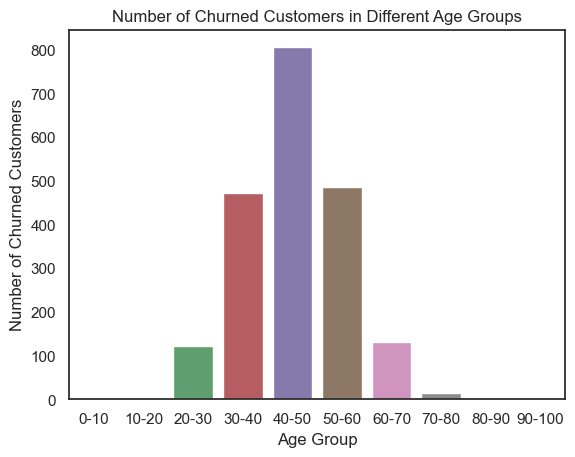

In [36]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)


sns.countplot(data=data[data['Exited'] == 1], x='AgeGroup')
plt.xlabel('Age Group')
plt.ylabel('Number of Churned Customers')
plt.title('Number of Churned Customers in Different Age Groups')
plt.show()

#### Most of the customers who churned are in the age group 40-50 .

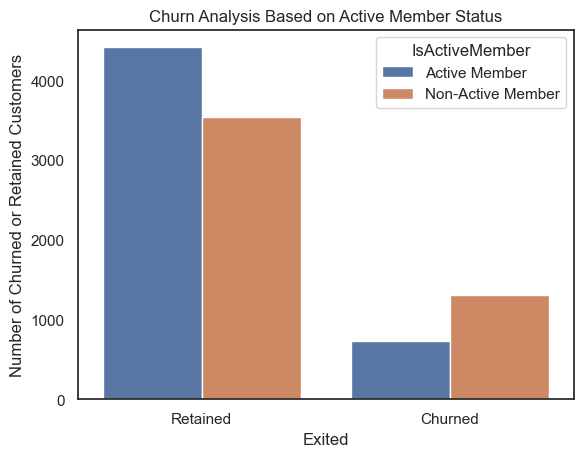

In [37]:

data['IsActiveMember'] = data['IsActiveMember'].map({0: 'Non-Active Member', 1: 'Active Member'})


sns.countplot(data=data, x="Exited", hue="IsActiveMember")

plt.ylabel('Number of Churned or Retained Customers')
plt.title('Churn Analysis Based on Active Member Status')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.show()

#### Non active members are more likely to get churned than active members,Active members are more likely to Retain with the bank

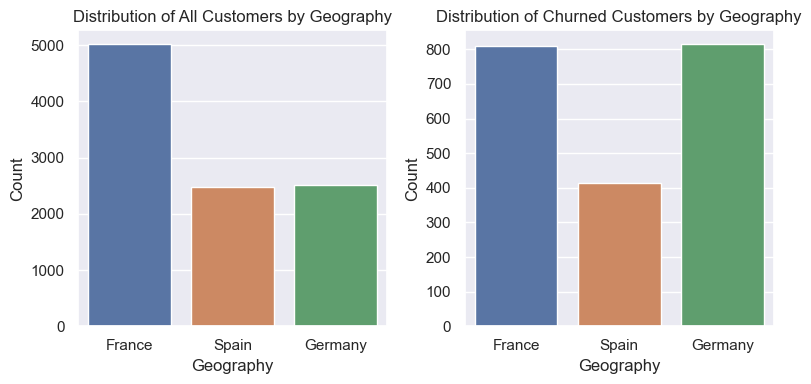

In [38]:
sns.set_theme(style='darkgrid')

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(8,4))

# Plot count plot for all customers by geography
sns.countplot(data=data, x='Geography', ax=axes[0])
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of All Customers by Geography')

# Plot count plot for churned customers by geography
sns.countplot(data=data[data['Exited'] == 1], x='Geography', ax=axes[1])
axes[1].set_xlabel('Geography')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Churned Customers by Geography')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

#### Most of the customers are from France but most of the churned customers are from Germany followed by France

## DATA CLEANING

### 1. DROPING COLUMNS

In [39]:
data=data.drop(["AgeGroup","RowNumber","CustomerId","Surname","EstimatedSalary"],axis=1)

In [40]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,Active Member,1
1,608,Spain,Female,41,1,83807.86,1,0,Active Member,0
2,502,France,Female,42,8,159660.80,3,1,Non-Active Member,1
3,699,France,Female,39,1,0.00,2,0,Non-Active Member,0
4,850,Spain,Female,43,2,125510.82,1,1,Active Member,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,Non-Active Member,0
9996,516,France,Male,35,10,57369.61,1,1,Active Member,0
9997,709,France,Female,36,7,0.00,1,0,Active Member,1
9998,772,Germany,Male,42,3,75075.31,2,1,Non-Active Member,1


### 2. BALANCE COLUMN

In [41]:
# converting data type of Balance column
data['Balance'] = data['Balance'].astype(int)

### 3.LABEL ENCODING

In [42]:
geo=LabelEncoder()
gen=LabelEncoder()
active=LabelEncoder()

data["Geography"]=geo.fit_transform(data["Geography"])
data["Gender"]=gen.fit_transform(data["Gender"])
data["IsActiveMember"]=active.fit_transform(data["IsActiveMember"])



In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CreditScore     10000 non-null  int64
 1   Geography       10000 non-null  int32
 2   Gender          10000 non-null  int32
 3   Age             10000 non-null  int64
 4   Tenure          10000 non-null  int64
 5   Balance         10000 non-null  int32
 6   NumOfProducts   10000 non-null  int64
 7   HasCrCard       10000 non-null  int64
 8   IsActiveMember  10000 non-null  int32
 9   Exited          10000 non-null  int64
dtypes: int32(4), int64(6)
memory usage: 625.1 KB


### 4. ADDING NEW COLUMN

In [44]:
data['IsSenior'] = data['Age'].apply(lambda x: 1 if x >= 60 else 0)

In [45]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,IsSenior
0,619,0,0,42,2,0,1,1,0,1,0
1,608,2,0,41,1,83807,1,0,0,0,0
2,502,0,0,42,8,159660,3,1,1,1,0
3,699,0,0,39,1,0,2,0,1,0,0
4,850,2,0,43,2,125510,1,1,0,0,0


## TRAINING MODEL

In [46]:
x=data.drop("Exited",axis=1)

In [47]:
y=data["Exited"]

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [34]:
# LOGISTIC REGRESSION

log=LogisticRegression(fit_intercept=True)
log.fit(x_train,y_train)
log.score(x_test,y_test)

0.8265

In [35]:
# DECISIONTREE CLASSIFIER

dtc=DecisionTreeClassifier(max_depth=6)
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.857

In [36]:
# RANDOM FOREST CLASSIFIER

rfc=RandomForestClassifier(n_estimators=500,random_state=42)
rfc.fit(x_train,y_train)

rfc.score(x_test,y_test)



0.8715

In [37]:
# EXTRA TREE REGRESSOR

from sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(n_estimators=100,random_state=42)
etc.fit(x_train,y_train)
etc.score(x_test,y_test)

0.863

In [38]:
# EXTREME GRADIENT BOOSTING CLASSIFIER

xgbc = XGBClassifier(learning_rate=0.2, max_depth=6, n_estimators=200)
xgbc.fit(x_train, y_train)
xgbc.score(x_test,y_test)

0.867

In [39]:
# K-NEIGHBORS CLASSIFIER

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.846

In [40]:
# GRADIENT BOOSTING CLASSIFIER

gbc=GradientBoostingClassifier(learning_rate=0.2,n_estimators=300,max_depth=6)
gbc.fit(x_train,y_train)
gbc.score(x_test,y_test)


0.8565

In [41]:
#ADABOOST CLASSIFIER

abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),learning_rate=0.2,n_estimators=250)
abc.fit(x_train,y_train)
abc.score(x_test,y_test)

C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.79

## MODEL EVALUATION

In [45]:
stratified_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

logistic_regression_score = []
decision_tree_score = []
random_forest_score = []
adaboost_score = []
xgboost_score = []
gradient_boost_score = []
knn_score = []

# Loop through the cross-validation splits using StratifiedKFold
for train_index, test_index in stratified_fold.split(x, y):
    # Reset the index of the DataFrame
    x_train, x_test = x.iloc[train_index].reset_index(drop=True), x.iloc[test_index].reset_index(drop=True)
    y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)
    
    # Logistic Regression
    logistic_model = LogisticRegression(random_state=42)
    logistic_regression_score.append(get_score(logistic_model, x_train, x_test, y_train, y_test))
    
    # Decision Tree
    decision_tree_model = DecisionTreeClassifier(random_state=42)
    decision_tree_score.append(get_score(decision_tree_model, x_train, x_test, y_train, y_test))
    
    # RandomForest
    random_forest_model = RandomForestClassifier(random_state=42)
    random_forest_score.append(get_score(random_forest_model, x_train, x_test, y_train, y_test))
    
    # AdaBoostClassifier
    adaboost_model = AdaBoostClassifier(random_state=42)
    adaboost_score.append(get_score(adaboost_model, x_train, x_test, y_train, y_test))
    
    # XGBoost
    xgboost_model = XGBClassifier(random_state=42)
    xgboost_score.append(get_score(xgboost_model, x_train, x_test, y_train, y_test))
    
    # Gradient Boosting
    gradient_boost_model = GradientBoostingClassifier(random_state=42)
    gradient_boost_score.append(get_score(gradient_boost_model, x_train, x_test, y_train, y_test))
    
    #KNN
    knn_model=KNeighborsClassifier()
    knn_score.append(get_score(knn_model,x_train,x_test,y_train,y_test))

In [46]:
logistic_regression_score

[0.789, 0.782, 0.791, 0.79, 0.794]

In [47]:
decision_tree_score

[0.796, 0.7835, 0.791, 0.794, 0.7955]

In [48]:
random_forest_score

[0.851, 0.848, 0.8585, 0.868, 0.8615]

In [49]:
adaboost_score

[0.8505, 0.8475, 0.8555, 0.8615, 0.8605]

In [50]:
xgboost_score

[0.8455, 0.8455, 0.8625, 0.858, 0.863]

In [51]:
gradient_boost_score

[0.8615, 0.856, 0.866, 0.869, 0.858]

In [52]:
knn_score

[0.762, 0.7535, 0.7705, 0.7605, 0.7505]

## HYPERPARAMETER TUNING

In [53]:
model_params = {
    "random_forest": {"model": RandomForestClassifier(), "params": {"n_estimators": [50, 200, 100, 500], "random_state": [42, 100, 200, 500]}},
    "logistic_regression": {"model": LogisticRegression(), "params": {"fit_intercept": [True, False]}},
    "adaboost": {"model": AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), "params": {"n_estimators": [50, 100, 200, 500], "learning_rate": [0.25, 0.1, 0.2]}},
    "gradient_boosting": {"model": GradientBoostingClassifier(), "params": {"n_estimators": [100, 200, 300, 50], "learning_rate": [0.1, 0.25, 0.2], "max_depth": [4, 5, 6, 7]}},
    "xgboost": {"model": XGBClassifier(), "params": {"n_estimators": [65, 100, 200, 300], "learning_rate": [0.1, 0.15, 0.2, 0.25], "max_depth": [4, 5, 6, 7]}},
    "decision_tree": {"model": DecisionTreeClassifier(), "params": {"max_depth": [5, 6, 7]}},
    "knn": {"model": KNeighborsClassifier(), "params": {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']}}
}

scores = []
models = ["random_forest", "logistic_regression", "adaboost", "gradient_boosting", "xgboost", "decision_tree", "knn"]

for model_name in models:
    mp = model_params[model_name]
    gds = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=True, scoring='accuracy')
    gds.fit(x_train, y_train)
    scores.append({"model": model_name, "best_score": gds.best_score_, "best_params": gds.best_params_})

C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-package

C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\T440\anaconda3\Lib\site-package

In [54]:
df=pd.DataFrame(scores)
df

,model,best_score,best_params
0,random_forest,0.859750,"{'n_estimators': 100, 'random_state': 100}"
1,logistic_regression,0.789750,{'fit_intercept': True}
2,adaboost,0.792875,"{'learning_rate': 0.2, 'n_estimators': 50}"
3,gradient_boosting,0.862125,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti..."
4,xgboost,0.863625,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est..."
5,decision_tree,0.853750,{'max_depth': 6}
6,knn,0.781875,"{'n_neighbors': 9, 'weights': 'uniform'}"


In [55]:
scores

[{'model': 'random_forest',
  'best_score': 0.85975,
  'best_params': {'n_estimators': 100, 'random_state': 100}},
 {'model': 'logistic_regression',
  'best_score': 0.7897500000000001,
  'best_params': {'fit_intercept': True}},
 {'model': 'adaboost',
  'best_score': 0.7928750000000001,
  'best_params': {'learning_rate': 0.2, 'n_estimators': 50}},
 {'model': 'gradient_boosting',
  'best_score': 0.862125,
  'best_params': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}},
 {'model': 'xgboost',
  'best_score': 0.8636250000000001,
  'best_params': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 65}},
 {'model': 'decision_tree',
  'best_score': 0.85375,
  'best_params': {'max_depth': 6}},
 {'model': 'knn',
  'best_score': 0.781875,
  'best_params': {'n_neighbors': 9, 'weights': 'uniform'}}]

## BEST MODEL

In [50]:
final_model=RandomForestClassifier(n_estimators=500,random_state=42)
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.8715

In [51]:
final_model.score(x_train,y_train)

1.0

In [52]:
y_pred=final_model.predict(x_test)

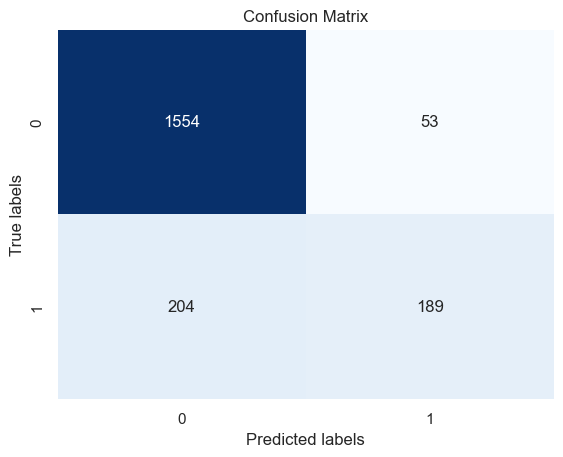

In [53]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,IsSenior
0,619,0,0,42,2,0,1,1,0,1,0
1,608,2,0,41,1,83807,1,0,0,0,0
2,502,0,0,42,8,159660,3,1,1,1,0
3,699,0,0,39,1,0,2,0,1,0,0
4,850,2,0,43,2,125510,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0,2,1,1,0,0
9996,516,0,1,35,10,57369,1,1,0,0,0
9997,709,0,0,36,7,0,1,0,0,1,0
9998,772,1,1,42,3,75075,2,1,1,1,0


## USER-INPUTTING AND PREDICTION

In [70]:
credit_score=int(input("Enter the Credit Score \n"))  

geography=input("enter the Country name:[France,Spain,Germany] \n")           
geography=int(geo.transform([geography]))

gender=input("enter the Gender[Male,Female] \n")
gender=int(gen.transform([gender]))

Age=int(input("Enter the Age \n"))  
Tenure=int(input("Enter the Tenure [0,1,2,3,4,5,6,7,8,9,10]\n")) 
Balance=int(input("Enter the Account Balance \n")) 
Nproducts=int(input("Enter number of products used by customer:[1,2,3,4]\n"))  
Hcred=int(input("Does the customer own Credit Card[0-No , 1-Yes][Give numerical input]\n"))  

isactive=input("Are you a active customer[Active Member,Non-Active Member] \n")
isactive=int(active.transform([isactive]))

AgeG=int(input("Is Customer Senior Citizen[0-No , 1-Yes][Give numerical input]\n"))  


Enter the Credit Score 
300
enter the Country name:[France,Spain,Germany] 
France
enter the Gender[Male,Female] 
Male
Enter the Age 
34
Enter the Tenure [0,1,2,3,4,5,6,7,8,9,10]
5
Enter the Account Balance 
30000
Enter number of products used by customer:[1,2,3,4]
2
Does the customer own Credit Card[0-No , 1-Yes][Give numerical input]
1
Are you a active customer[Active Member,Non-Active Member] 
Active Member
Is Customer Senior Citizen[0-No , 1-Yes][Give numerical input]
0


In [71]:
input_features = [credit_score,geography,gender,Age,Tenure,Balance,Nproducts,Hcred,isactive,AgeG]

#Convert the list to a numpy array for prediction
input_array = np.array(input_features).reshape(1, -1)

# # Make predictions
prediction = final_model.predict(input_array)
if prediction==0:
    print("Customer has not churned")
else:
    print("customer churned")


Customer has not churned


C:\Users\T440\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
